In [1]:
import models.get_model
import torch
from utils.loader import DicomDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import utils.notebooks as nb

In [2]:
training_data= DicomDataset("data/train.csv")
train_dataloader = DataLoader(training_data, batch_size=10)

inputs shape: torch.Size([10, 1, 512, 512])
labels shape: torch.Size([10, 1, 512, 512])
inputs type: torch.float32
labels type: torch.float32


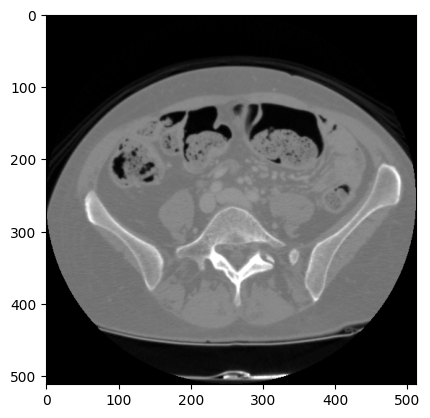

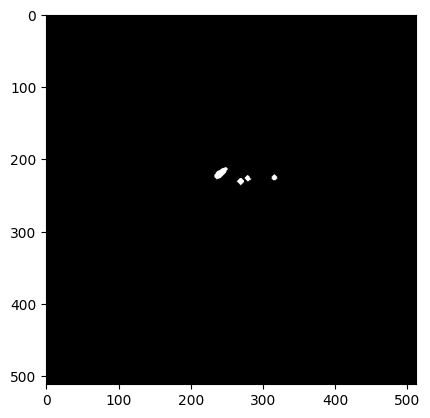

In [3]:
from utils.loader import DicomDataset
import utils.notebooks as nb

train_features, train_labels = next(iter(train_dataloader))
print(f'inputs shape: {train_features.shape}')
print(f'labels shape: {train_labels.shape}')
feat1, label1 = train_features[0], train_labels[0]
print(f'inputs type: {feat1.dtype}')
print(f'labels type: {label1.dtype}')

nb.show(feat1)
nb.show(label1)

In [4]:
from tqdm import tqdm

model = models.get_model.get_arch('wnet', in_c=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

for data in tqdm(iter(train_dataloader)):
    inputs, labels = data
    input = inputs
    label = labels

    optimizer.zero_grad()

    out1, output = model(input)
    loss = criterion(output, label)

    loss.backward()
    optimizer.step()


NameError: name 'tqdm' is not defined